# Kaggle Competition for house Prices: Advance Regression Techniques

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('test.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
df.shape

(1459, 80)

In [5]:
pd.options.display.min_rows = 200

In [6]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

<AxesSubplot:>

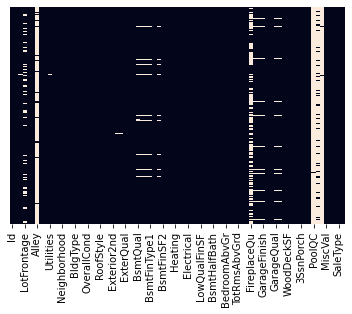

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
these columns have null values

We delete those columns which have more than 50% null values
We fill other columns with values using mean,median,mode.

In [9]:
var = df.isnull().sum()
print(var.to_string())

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [10]:
df['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [11]:
df['MSZoning']=df['MSZoning'].fillna(df['MSZoning'].mode()[0])

In [12]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [13]:
df.drop(['Alley'],axis=1,inplace=True)

In [14]:
df['Utilities'].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [15]:
df['Utilities']=df['Utilities'].fillna(df['Utilities'].mode()[0])

In [16]:
df['Exterior1st'].value_counts()

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [17]:
df['Exterior1st']=df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])

In [18]:
df['Exterior2nd']=df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

In [19]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

In [20]:
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

In [21]:
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [22]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])

In [23]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

In [24]:
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])

In [25]:
df['BsmtFinSF1']=df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].mean())

In [26]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [27]:
df['BsmtFinSF2']=df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].mean())

In [28]:
df['BsmtUnfSF']=df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].mean())

In [29]:
df['TotalBsmtSF']=df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mean())

In [30]:
df['BsmtFullBath']=df['BsmtFullBath'].fillna(df['BsmtFullBath'].mean())

In [31]:
df['KitchenQual']=df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

In [32]:
df['Functional']=df['Functional'].fillna(df['Functional'].mode()[0])

In [33]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])  
#df.drop(['FireplaceQu'],axis=1,inplace=True)

In [34]:
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [35]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [36]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])

In [37]:
df['GarageCars']=df['GarageCars'].fillna(df['GarageCars'].mean())

In [38]:
df['GarageArea']=df['GarageArea'].fillna(df['GarageArea'].mean())

In [39]:
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])

In [40]:
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [41]:
df.drop(['PoolQC'],axis=1,inplace=True)
df.drop(['Fence'],axis=1,inplace=True)
df.drop(['MiscFeature'],axis=1,inplace=True)

#df.drop(['PoolQC','MiscFeature','Fence'],axis=1,inplace=True)

In [42]:
#df.drop(['Id'],axis=1,inplace=True)

In [43]:
df.shape

(1459, 76)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

<AxesSubplot:>

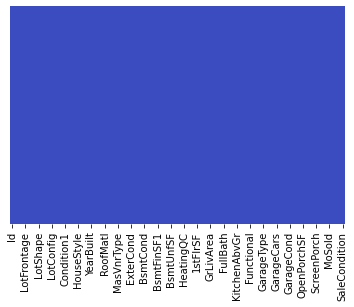

In [45]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [46]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [47]:
cat_col=df.select_dtypes(include=['object']).columns.tolist()

cat_col

In [48]:
len(cat_col)

39

In [49]:
df.to_csv('formulatedtest.csv',index=False)

Mean square Error after submission:
    0.14257 rank 1745